In [1]:
# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 8,8
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [3]:
import numpy as np
import javabridge
import bioformats

In [4]:
# Ignore warnings in notebook
import warnings
warnings.filterwarnings('ignore')

In [ ]:
cd ..

In [6]:
from utils import *

# Loading a typical image using bioformats

In [7]:
javabridge.start_vm(class_path=bioformats.JARS)

In [8]:
path = '/im.dv'

In [9]:
image = load_data.load_bioformats(path)

In [10]:
javabridge.kill_vm()

In [11]:
image.shape

(81, 480, 480, 4)

In [12]:
img = image[:,:,:,3]

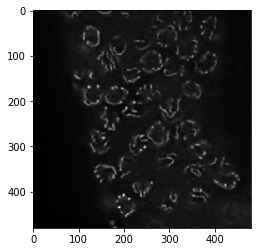

In [13]:
plt.imshow(img[53])

# Sliding Window

In [20]:
from sklearn.externals import joblib

In [21]:
clf = joblib.load("/clf")
scaler = joblib.load("/scaler")

In [22]:
import time

In [33]:
tp1 = time.time()
result = search.sliding_window(img, clf, scaler)
tp2 = time.time()

In [34]:
print("It took {}sec to find the chromosomes in 1 Zstack".format(int(tp2-tp1)))

It took 312sec to find the chromosomes in 1 Zstack


In [35]:
heat_map = visualization.heatmap(result, img)

In [37]:
visualization.browse_images(heat_map)

### Max projection and check how the result looks like

In [42]:
proj = np.amax(img, axis=0)

### When boxes are overlapping, only keep the highest probability one

In [47]:
box = search.non_max_suppression(result, probaThresh=0.01, overlapThresh=0.3)

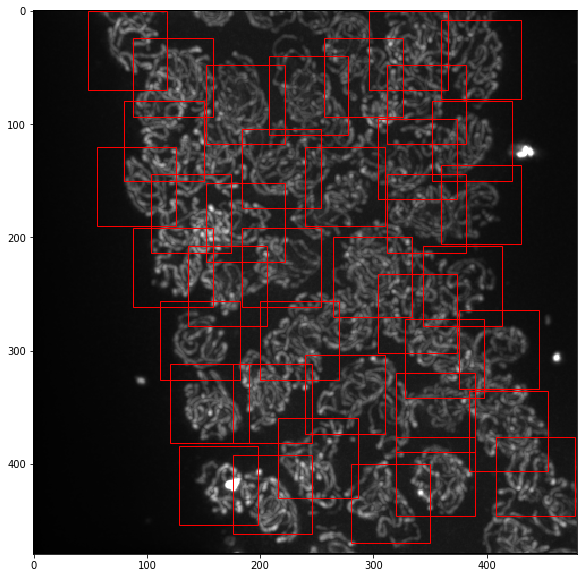

In [48]:
import matplotlib.patches as patches
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(proj, vmax = 150000)
for rec in box: 
    rect = patches.Rectangle((rec[0],rec[1]),70,70,linewidth=1,edgecolor='r',facecolor='none')
    # Add the patch to the Axes
    ax.add_patch(rect)

### Create a binary image with an elipse at the position of the chromosome

In [49]:
binary = search.binary(box, img)

In [51]:
visualization.browse_images_overlay(binary, img)

# Save the result

In [52]:
path = "/Users/"

In [56]:
load_data.save_file(path, "bbox_3D", box, model=False)
load_data.save_file(path, "bbox_3D", binary, model=False)